# Grid World Visualization--Part I
Consider a grid world modeled using a 2D numpy array of dimension of $10\times 10$. There are 10 robots moving in the field. Write a function, named `display_grid` that takes the current locations of all robots as inputs, and displays the locations of all robots. Use appropriate plot to display the locations, and clearly label your plot. Read the documentation of `xlim` and `ylim`, and use them to make sure that the whole grid can be displayed in your plot.

An example of robot locations, i.e., input to the function, is given below:

```py
 location = np.array([[9 8],
                    [8 7],
                    [9 3],
                    [4 3],
                    [3 1],
                    [3 2],
                    [2 7],
                    [4 4],
                    [0 0],
                    [5 4]])
```
Each row of the input array corresponds to an agent. The first column represents the row indices of all agents, and the second column represents the column indices of all agents in the field. An exmaple output is given below:
![Example output](assets/robot_location.png)

# Grid World Visualization--Part II
Each robot can take one out of four actions: ["up", "down", "left", "right"], indicating the direction towards which the robot will move. If the moving direction will make the robot go outside the boundary of the grid world, then the robot will remain at its current location.

Write a function named `update_location` that takes the current location and action of a robot as inputs, and return its updated location. Feel free to verify your code by plotting the locations of robot before and after taking actions.

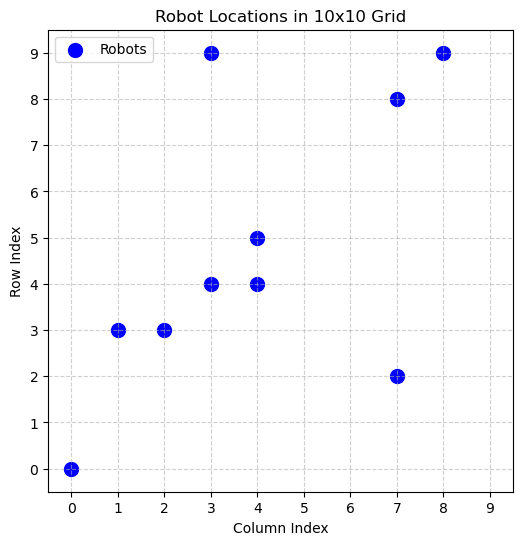

Original: [9 8]
Move Up: [9 8]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Part I: Display Function ---
def display_grid(locations):
    """
    Visualizes the grid and robot locations.
    Assuming a 10x10 grid.
    locations: shape (N, 2), where column 0 is row index (y), column 1 is col index (x)
    """
    plt.figure(figsize=(6, 6))
    
    # Extract x (column index) and y (row index)
    # Note: usually in grid worlds, index 0 is x, index 1 is y, 
    # but prompt says: col 0 is row indices, col 1 is column indices.
    rows = locations[:, 0]
    cols = locations[:, 1]
    
    # Plot robots
    plt.scatter(cols, rows, c='blue', marker='o', s=100, label='Robots')
    
    # Grid settings
    plt.xlim(-0.5, 9.5) # Allow space to see points on edges
    plt.ylim(-0.5, 9.5)
    plt.xticks(np.arange(0, 10, 1))
    plt.yticks(np.arange(0, 10, 1))
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.title("Robot Locations in 10x10 Grid")
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.legend()
    plt.show()

# Test Data from assignment
location_data = np.array([[9, 8], [8, 7], [9, 3], [4, 3], [3, 1], 
                          [3, 2], [2, 7], [4, 4], [0, 0], [5, 4]])

display_grid(location_data)


# --- Part II: Update Location Function ---
def update_location(current_loc, action):
    """
    current_loc: np.array([row, col])
    action: string "up", "down", "left", "right"
    Returns: updated location as np.array
    """
    row, col = current_loc
    new_row, new_col = row, col
    
    # Assuming standard matrix direction usually: 
    # But "Grid World" usually implies Cartesian (Up increases Y/Row).
    # If (0,0) is bottom-left: Up means Row + 1.
    # Let's assume (0,0) is bottom-left based on standard RL grid worlds.
    
    if action == "up":
        new_row += 1
    elif action == "down":
        new_row -= 1
    elif action == "left":
        new_col -= 1
    elif action == "right":
        new_col += 1
        
    # Boundary Check (Must be between 0 and 9)
    # If out of bounds, revert to original
    if 0 <= new_row < 10 and 0 <= new_col < 10:
        return np.array([new_row, new_col])
    else:
        return np.array([row, col]) # Stay put

# Verification logic
print(f"Original: {location_data[0]}")
new_loc = update_location(location_data[0], "up")
print(f"Move Up: {new_loc}")

# Infectious Disease Visualization
Revise your function "simulate_disease" from previous assignment to achieve the following goals. The function should print out the statistic information of the infection probability at the end of prediction horizon, including minimum, maximum, average, and standard deviation.

The function should also plot how the infection probabilities of all individuals evolve over the prediction horizon. Pick appropriate visualization plot and clearly label your plot. You do not need to generate legends for the plot. 


------------------------------
Statistics at End of Prediction Horizon:
Minimum: 0.4595
Maximum: 0.5542
Average: 0.5072
Std Dev: 0.0194
------------------------------


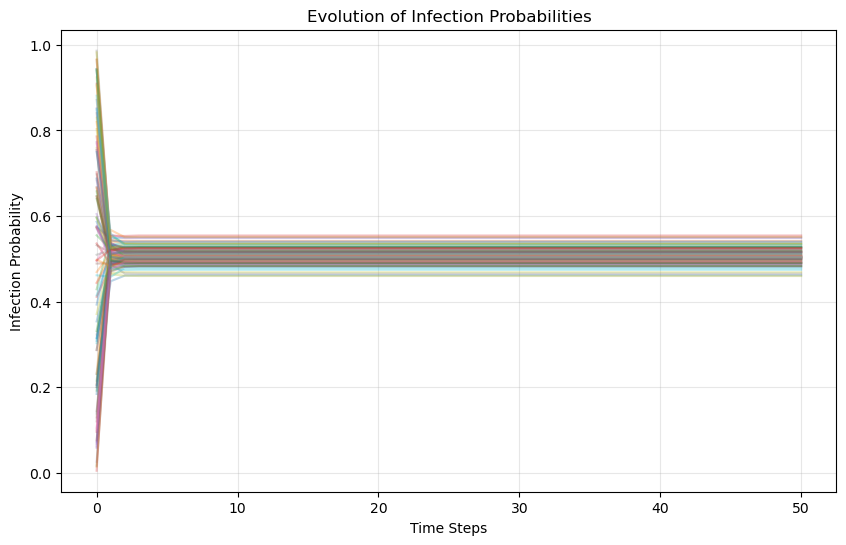

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_disease(initial_prob, connection_matrix, time_horizon):
    """
    Simulates disease propagation based on Assignment 5 logic, 
    prints statistics, and plots evolution for Assignment 6.
    
    Args:
        initial_prob (np.array): 1D array of initial infection probabilities.
        connection_matrix (np.array): 2D array representing connection strength.
        time_horizon (int): Number of time steps.
    """
    n_individuals = len(initial_prob)
    current_prob = initial_prob
    
    # 1. Initialize an array to store history for plotting
    # Shape is (time_steps + 1, n_individuals)
    history = np.zeros((time_horizon + 1, n_individuals))
    history[0] = current_prob
    
    # 2. Simulation Loop (Core logic from Assignment 5)
    for t in range(1, time_horizon + 1):
        # The core algorithm from Assignment 5: P(t+1) = P(t) * M
        current_prob = np.dot(current_prob, connection_matrix)
        history[t] = current_prob # Store history
        
    # 3. Assignment 6 Requirement: Statistics
    final_probs = history[-1, :] # Get probabilities at the last step
    print("-" * 30)
    print("Statistics at End of Prediction Horizon:")
    print(f"Minimum: {np.min(final_probs):.4f}")
    print(f"Maximum: {np.max(final_probs):.4f}")
    print(f"Average: {np.mean(final_probs):.4f}")
    print(f"Std Dev: {np.std(final_probs):.4f}")
    print("-" * 30)
    
    # 4. Assignment 6 Requirement: Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(history, alpha=0.3) # alpha makes lines semi-transparent
    plt.title("Evolution of Infection Probabilities")
    plt.xlabel("Time Steps")
    plt.ylabel("Infection Probability")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return final_probs

# --- Test Code (Using random data as provided in Assignment 5) ---
N = 100
T = 50
np.random.seed(20)
matrix = np.random.rand(N, N)
symmetric_matrix = (matrix + matrix.T) / 2
# Normalize to ensure row-stochastic property
connection_matrix = symmetric_matrix / symmetric_matrix.sum(axis=1, keepdims=True)

# Generate initial infection probabilities
initial_prob = np.random.rand(N)

# Run the function
_ = simulate_disease(initial_prob, connection_matrix, T)

# Image Downsampling
Write a function named `downsample_image`. The function takes a grayscale image and an integer downsampling rate as input and outputs a filtered version of the image. The input image is represented by a 2D numpy array. You can assume the image is of a square shape, and the image size is larger than downsampling rate. To downsample the image, we follow the steps below:
- Partition the image into a collection of smaller blocks. Each block is of dimension $k\times k$, where $k$ is the downsampling rate. If the original image is of dimension $N\times N$, then the rows and columns are partitions into $\frac{N}{k}$ segments, respectively. The output image should then be of dimension $\frac{N}{k}\times \frac{N}{k}$.
- For each block associated with $i$-th row segment, and $j$-th column segment, calculate the average of all pixels within the block, and the average is $(i,j)$-th pixel in output image is assigned as the average. 


Your function should display the downsampled image. An example of the downsampling process is given below:
![downsample process](assets/filter.gif)

The red block in this example is sometimes referred to as a kernel. The kernel in this example is known as a moving average filter. 

Please use this image to test your function. Although this is a colorful image, you can convert it to grayscale using the code below and then pass it to the function:

```py
from PIL import Image
img = Image.open('sample_image_2.jpg').convert('L') # load image in gray scale
img_array = np.array(img) # 8-bit code grayscale
```
See an example of downsampled image with downsampling rate=5:

![downsampled image](assets/dsimg.png)


Revise your function to downsample a colorful image. Note that a colorful image can be represented as a 3D numpy array, where the 3rd dimension represents the RGB channels.

**Extra challenge** (this challenge is not graded): This challenge will test your code efficiency. You need to improve your code to achieve runtime . Please use the following code to test your efficiency:


Error: 'sample_image_2.jpg' not found. Please upload the image file.
Using dummy image instead...


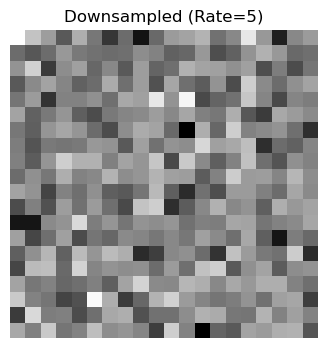

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def downsample_image(image, downsampling_rate):
    """
    Downsamples an image by averaging pixels in k x k blocks.
    Handles both Grayscale (2D) and RGB (3D) images.
    """
    k = downsampling_rate
    
    # Check if image is Grayscale (2D) or RGB (3D)
    if image.ndim == 2:
        h, w = image.shape
        new_h, new_w = h // k, w // k
        
        # Crop and Reshape
        curr_img = image[:new_h*k, :new_w*k]
        reshaped = curr_img.reshape(new_h, k, new_w, k)
        
        # Calculate mean
        downsampled = reshaped.mean(axis=(1, 3))
        
    elif image.ndim == 3:
        h, w, c = image.shape
        new_h, new_w = h // k, w // k
        
        # Crop and Reshape
        curr_img = image[:new_h*k, :new_w*k, :]
        reshaped = curr_img.reshape(new_h, k, new_w, k, c)
        
        # Calculate mean
        downsampled = reshaped.mean(axis=(1, 3))
        
    # Display
    downsampled = downsampled.astype(np.uint8)
    plt.figure(figsize=(4,4))
    if downsampled.ndim == 2:
        plt.imshow(downsampled, cmap='gray')
    else:
        plt.imshow(downsampled)
    plt.title(f"Downsampled (Rate={k})")
    plt.axis('off')
    plt.show()
    
    return downsampled

# --- Test with Real Image ---
try:
    # Make sure 'sample_image_2.jpg' is in the same folder as your notebook
    img = Image.open('sample_image_2.jpg').convert('L') 
    img_array = np.array(img)
    
    print("Testing with Real Image:")
    img_ds = downsample_image(img_array, 5)
    
except FileNotFoundError:
    print("Error: 'sample_image_2.jpg' not found. Please upload the image file.")
    # Fallback to dummy image if real one is missing
    print("Using dummy image instead...")
    dummy_img = np.random.randint(0, 255, (100, 100), dtype=np.uint8)
    downsample_image(dummy_img, 5)

In [5]:
timeit -n 1 -r 7 img_ds2 = downsample_image(image=img_array, downsampling_rate=5)

NameError: name 'downsample_image' is not defined

# Word Embedding
LLMs represent words as high dimensional vectors (also known as embeddings). You’ll explore how simple embeddings can capture semantic meanings. Example embeddings of a limited vocabulary are provided below.
- Can you propose a metric to measure the similarity between a pair of words? **Hint**: You have seen a measure in previous assignments.
- Choose an appropriate visualization to show which words are most similar to each other.
- What word do you obtain for `king – man + woman` using vector arithmetic? Does this result make sense to you? Why or why not.

In [ ]:
embeddings = {
  "king": [
    1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "queen": [
    1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "man": [
    0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "woman": [
    0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0
  ] + [0.0]*40,
  "apple": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2
  ] + [0.0]*40,
  "banana": [
    0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7
  ] + [0.0]*40
}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Helps with heatmap

# Given Embeddings
embeddings = {
  "king": np.array([1.0, 1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "queen": np.array([1.0, -1.0, 1.0, 0.0, 0.8, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "man": np.array([0.0, 1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "woman": np.array([0.0, -1.0, 1.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0, 0.0] + [0.0]*40),
  "apple": np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.7, 0.2, 0.6, 0.2] + [0.0]*40),
  "banana": np.array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.6, 0.8, 0.6, 0.7] + [0.0]*40)
}

# 1. Metric Proposal: Cosine Similarity
def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0.0
    return dot_product / (norm_v1 * norm_v2)

# 2. Visualization: Heatmap of similarities
keys = list(embeddings.keys())
n = len(keys)
sim_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        sim_matrix[i, j] = cosine_similarity(embeddings[keys[i]], embeddings[keys[j]])

plt.figure(figsize=(8, 6))
sns.heatmap(sim_matrix, xticklabels=keys, yticklabels=keys, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Word Similarity Matrix (Cosine Similarity)")
plt.show()

# 3. Vector Arithmetic: King - Man + Woman
# Goal: Should result in something close to "Queen"
target_vec = embeddings["king"] - embeddings["man"] + embeddings["woman"]

# Find the closest word to the target_vector
best_word = None
best_sim = -1

print("Similarity of (King - Man + Woman) to:")
for word, vec in embeddings.items():
    sim = cosine_similarity(target_vec, vec)
    print(f"{word}: {sim:.4f}")
    if sim > best_sim:
        best_sim = sim
        best_word = word

print(f"\nThe word closest to 'King - Man + Woman' is: **{best_word}**")

# Analysis Question Answer:
print("\nDoes this result make sense?")
print("Yes. In vector space, the relationship 'King is to Man as Queen is to Woman' implies:")
print("King - Man ≈ Queen - Woman, which rearranges to King - Man + Woman ≈ Queen.")
print("The high similarity score confirms that the embedding structure captures this semantic gender relationship.")